In [1]:
from transformers import GPT2TokenizerFast, GPT2LMHeadModel
import torch
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")
model.eval()

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [8]:
children_book_text="""

Here is Edward Bear, coming downstairs now, bump, bump, bump, on the back of his head, behind Christopher Robin. It is, as far as he knows, the only way of coming downstairs, but sometimes he feels that there really is another way, if only he could stop bumping for a moment and think of it. And then he feels that perhaps there isn't. Anyhow, here he is at the bottom, and ready to be introduced to you. Winnie-the-Pooh.

When I first heard his name, I said, just as you are going to say, "But I thought he was a boy?"

"So did I," said Christopher Robin.

"Then you can't call him Winnie?"

"I don't."

"But you said——"

"He's Winnie-ther-Pooh. Don't you know what 'ther' means?"

"Ah, yes, now I do," I said quickly; and I hope you do too, because it is all the explanation you are going to get.

Sometimes Winnie-the-Pooh likes a game of some sort when he comes downstairs, and sometimes he likes to sit quietly in front of the fire and listen to a story. This evening——

"What about a story?" said Christopher Robin.

"What about a story?" I said.

"Could you very sweetly tell Winnie-the-Pooh one?"

"I suppose I could," I said. "What sort of stories does he like?"

"About himself. Because he's that sort of Bear."

"Oh, I see."

"So could you very sweetly?"

"I'll try," I said.

So I tried.


"""

advanced_literature="""When on board H.M.S. 'Beagle,' as naturalist, I was much struck with certain facts in the
distribution of the inhabitants of South America, and in the geological relations of the present to the
past inhabitants of that continent. These facts seemed to me to throw some light on the origin of
species--that mystery of mysteries, as it has been called by one of our greatest philosophers. On
my return home, it occurred to me, in 1837, that something might perhaps be made out on this
question by patiently accumulating and reflecting on all sorts of facts which could possibly have
any bearing on it. After five years' work I allowed myself to speculate on the subject, and drew up
some short notes; these I enlarged in 1844 into a sketch of the conclusions, which then seemed to
me probable: from that period to the present day I have steadily pursued the same object. I hope
that I may be excused for entering on these personal details, as I give them to show that I have not
been hasty in coming to a decision."""

In [9]:
def compute_perplexity(text):
    encoded = tokenizer(text, return_tensors="pt", truncation=True, max_length=1024)
    input_ids = encoded["input_ids"]

    with torch.no_grad():
        outputs = model(input_ids=input_ids, labels=input_ids)
    
    loss = outputs.loss.item()
    return math.exp(loss)

In [10]:
ppl_child = compute_perplexity(children_book_text)
ppl_college = compute_perplexity(advanced_literature)

print("Children's Book PPL :", ppl_child)
print("College Text PPL    :", ppl_college)


Children's Book PPL : 12.53610762780634
College Text PPL    : 37.70854125182251


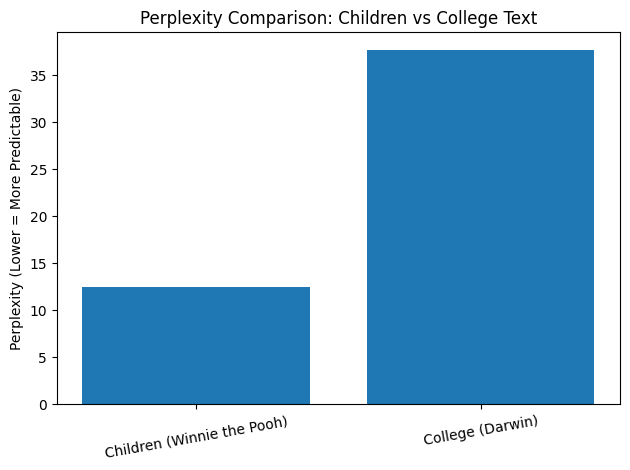

In [11]:
labels = ["Children (Winnie the Pooh)", "College (Darwin)"]
ppls = [ppl_child, ppl_college]

plt.figure()
plt.bar(labels, ppls)
plt.title("Perplexity Comparison: Children vs College Text")
plt.ylabel("Perplexity (Lower = More Predictable)")
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()